In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import utils

# Read data
df = pd.read_csv('./Data/Gas_Trade_Flows_IEA_202310 - Data.csv')
df.head()

,Borderpoint,Exit,Unnamed: 2,Entry,MAXFLOW (Mm3/h),Oct-08,Nov-08,Dec-08,Jan-09,Feb-09,...,Jan-23,Feb-23,Mar-23,Apr-23,May-23,Jun-23,Jul-23,Aug-23,Sep-23,Oct-23
0,Adriatic LNG,Liquefied Natural Gas,-->,Italy,1.10,0,0,0,0,0,...,687.0,654.0,850.0,714.0,809.0,620.0,823.0,693.0,754.0,745.0
1,Almeria,Algeria,-->,Spain,1.07,0,0,0,0,0,...,760.0,659.0,569.0,619.0,698.0,448.0,767.0,696.0,709.0,863.0
2,Alveringem,Belgium,-->,France,NaN,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Alveringem,France,-->,Belgium,0.37,0,0,0,0,0,...,644.0,616.0,185.0,240.0,392.0,396.0,195.0,50.0,394.0,371.0
4,Badajoz,Portugal,-->,Spain,0.30,0,0,0,0,12,...,54.0,0.0,4.0,91.0,139.0,84.0,44.0,25.0,19.0,27.0


### Process data

In [27]:
# Drop the unnamed column
df = df.drop(columns=['Unnamed: 2'])
df.head()

,Borderpoint,Exit,Entry,MAXFLOW (Mm3/h),Oct-08,Nov-08,Dec-08,Jan-09,Feb-09,Mar-09,...,Jan-23,Feb-23,Mar-23,Apr-23,May-23,Jun-23,Jul-23,Aug-23,Sep-23,Oct-23
0,Adriatic LNG,Liquefied Natural Gas,Italy,1.10,0,0,0,0,0,0,...,687.0,654.0,850.0,714.0,809.0,620.0,823.0,693.0,754.0,745.0
1,Almeria,Algeria,Spain,1.07,0,0,0,0,0,0,...,760.0,659.0,569.0,619.0,698.0,448.0,767.0,696.0,709.0,863.0
2,Alveringem,Belgium,France,NaN,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Alveringem,France,Belgium,0.37,0,0,0,0,0,0,...,644.0,616.0,185.0,240.0,392.0,396.0,195.0,50.0,394.0,371.0
4,Badajoz,Portugal,Spain,0.30,0,0,0,0,12,2,...,54.0,0.0,4.0,91.0,139.0,84.0,44.0,25.0,19.0,27.0


In [28]:
# Remove the columns with flow data beteen Oct-08 and Aug-09
df = df.drop(columns=['Oct-08', 'Nov-08', 'Dec-08', 'Jan-09', 'Feb-09', 'Mar-09', 'Apr-09', 'May-09', 'Jun-09', 'Jul-09', 'Aug-09', 'Sep-09', 'Oct-09', 'Nov-09', 'Dec-09'])

In [29]:
# Create a copy of the dataframe and call it country_aggregated_df
country_aggregated_df = df.copy()
country_aggregated_df.to_csv('./Data/country_aggregated.csv', index=False)
country_aggregated_df.head()

,Borderpoint,Exit,Entry,MAXFLOW (Mm3/h),Jan-10,Feb-10,Mar-10,Apr-10,May-10,Jun-10,...,Jan-23,Feb-23,Mar-23,Apr-23,May-23,Jun-23,Jul-23,Aug-23,Sep-23,Oct-23
0,Adriatic LNG,Liquefied Natural Gas,Italy,1.10,602,581,657,622,608,439,...,687.0,654.0,850.0,714.0,809.0,620.0,823.0,693.0,754.0,745.0
1,Almeria,Algeria,Spain,1.07,0,0,0,0,0,0,...,760.0,659.0,569.0,619.0,698.0,448.0,767.0,696.0,709.0,863.0
2,Alveringem,Belgium,France,NaN,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Alveringem,France,Belgium,0.37,0,0,0,0,0,0,...,644.0,616.0,185.0,240.0,392.0,396.0,195.0,50.0,394.0,371.0
4,Badajoz,Portugal,Spain,0.30,5,4,2,0,0,0,...,54.0,0.0,4.0,91.0,139.0,84.0,44.0,25.0,19.0,27.0


In [30]:
country_aggregated_df.shape

(228, 170)

In [31]:
unique_countries = set(country_aggregated_df['Exit'].unique()) | set(country_aggregated_df['Entry'].unique())

print("Data contains {} unique countries".format(len(unique_countries)))
print(unique_countries)


Data contains 45 unique countries
{'Libya', 'Romania', 'Estonia', 'Isle of Man', 'Tunisia', 'Hungary', 'Ireland', 'Portugal', 'Norway', 'Austria', 'Luxembourg', 'Not Elsewhere Specified', 'Finland', 'Serbia', 'Poland', 'Republic of Türkiye', 'Albania', 'Latvia', 'Belgium', 'United Kingdom', 'Bulgaria', 'Spain', 'Algeria', 'Liquefied Natural Gas', 'North Macedonia', 'Sweden', 'France', 'Moldova', 'Georgia', 'Russia', 'Switzerland', 'Belarus', 'Denmark', 'Czech Republic', 'Croatia', 'Lithuania', 'Morocco', 'Netherlands', 'Slovenia', 'Greece', 'Slovak Republic', 'Iran', 'Italy', 'Ukraine', 'Germany'}


In [32]:
# Retrieve columns with flow data 
mm_yyyy = df.iloc[:, df.columns.get_loc('Jan-10'):]

Text(0.5, 1.0, 'Heatmap of NaN values')

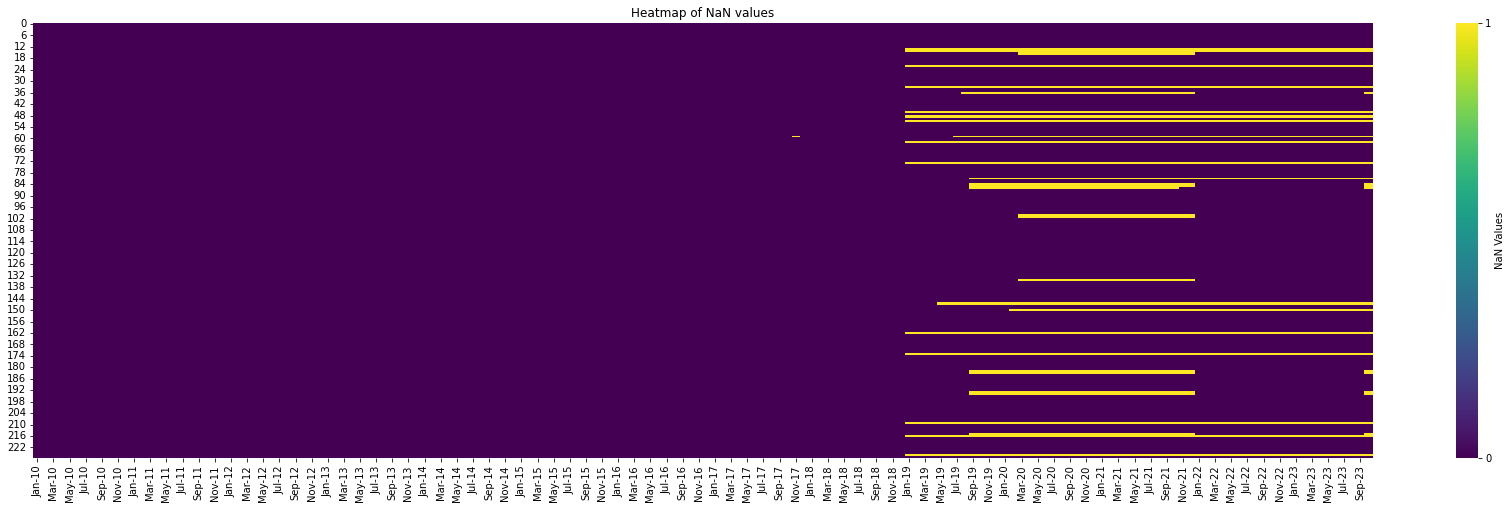

In [33]:
# Heatmap of NaN values
plt.figure(figsize=(30, 8))
sns.heatmap(mm_yyyy.isnull(), cmap='viridis', cbar_kws={'ticks': [0, 1], 'label': 'NaN Values'})
plt.title("Heatmap of NaN values")


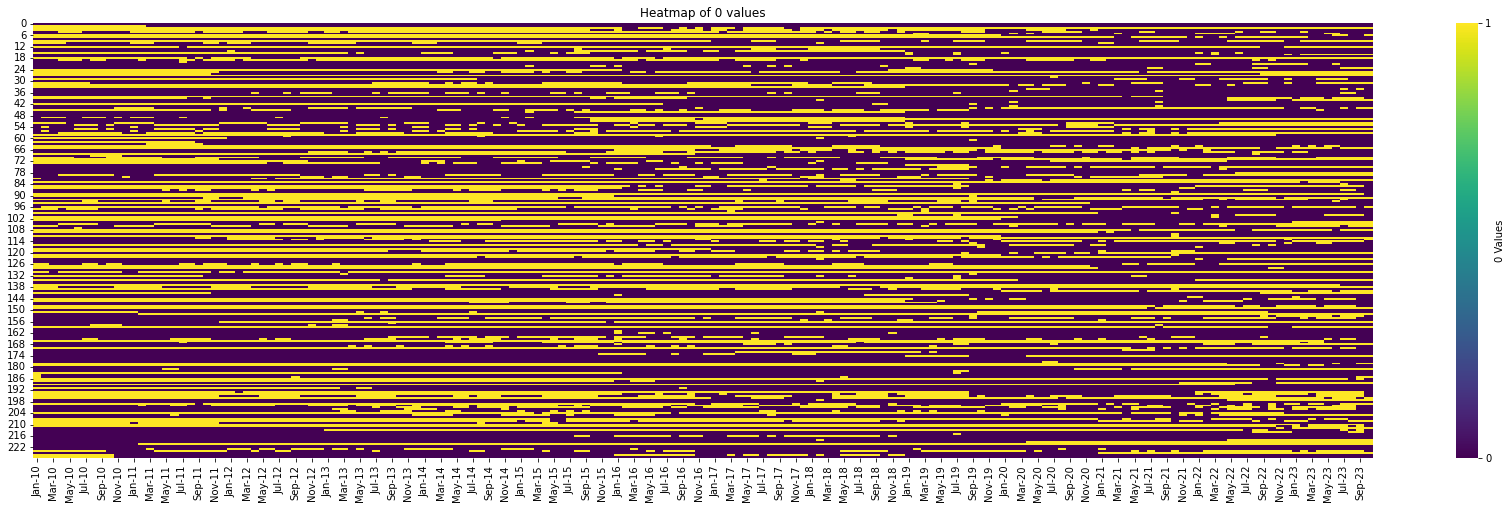

In [34]:
# Heatmap of 0 values
plt.figure(figsize=(30, 8))
sns.heatmap(mm_yyyy == 0, cmap='viridis', cbar_kws={'ticks': [0, 1], 'label': '0 Values'})
plt.title("Heatmap of 0 values")
plt.show()

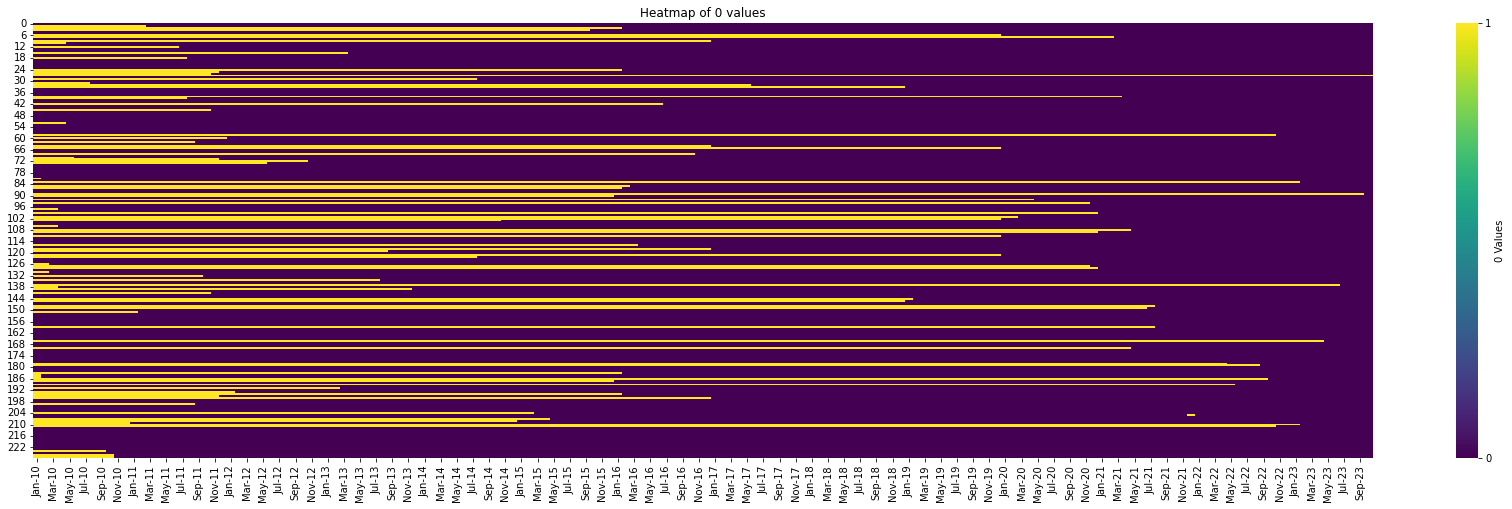

In [35]:
# If a pipeline is observed with non-zero flow at some point in time, we 'keep' the pipeline in the grid for subsequent periods (regardless of whether the flow is zero or not)

mm_yyyy_copy = mm_yyyy.copy()
for index, row in mm_yyyy_copy.iterrows():
    seen_nonzero = False
    for col in mm_yyyy_copy.columns:
        if row[col] == 0:
            if not seen_nonzero:
                mm_yyyy_copy.at[index, col] = -1
        else:
            seen_nonzero = True

# Heatmap of 0 values
plt.figure(figsize=(30, 8))
sns.heatmap(mm_yyyy_copy == -1, cmap='viridis', cbar_kws={'ticks': [0, 1], 'label': '0 Values'})
plt.title("Heatmap of 0 values")
plt.show()

### Create graph objects of grid per MM-YYYY

In [36]:
graphs = utils.create_graphs_from_dataset(country_aggregated_df)

### Development of borderpoints

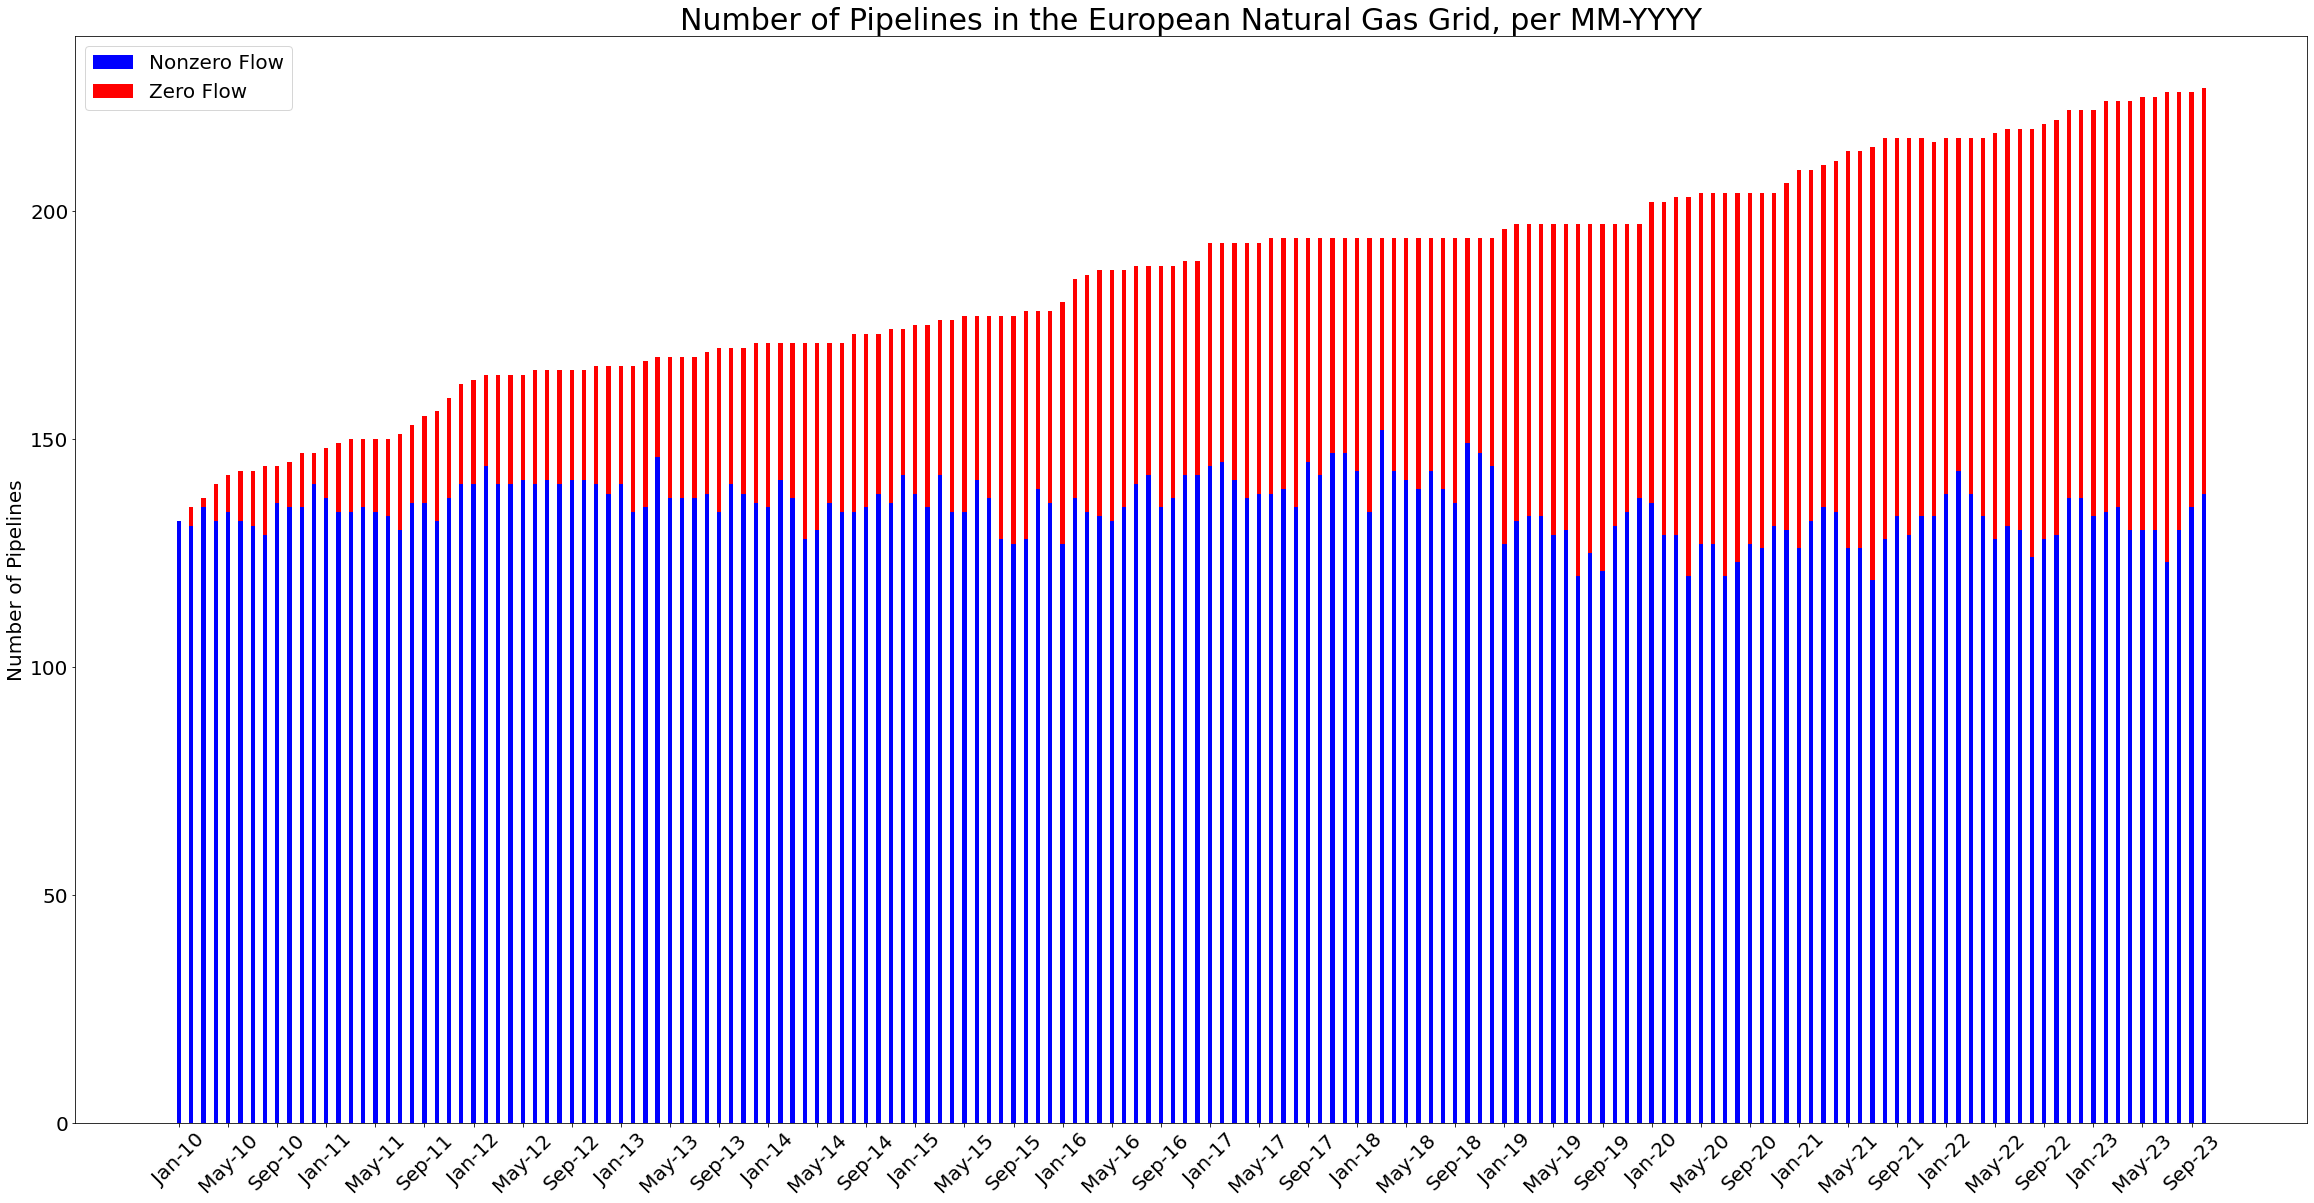

In [88]:
""" 
NOTE:
If a pipeline is observed with non-zero flow at some point in time, we 'keep' the pipeline 
in the grid for subsequent periods (regardless of whether the flow is zero or not)
"""

edge_counts_nonzero, edge_counts_zero = [sum(1 for edge in G.edges if G.edges[edge]['flow'] != 0) for G in graphs], [sum(1 for edge in G.edges if G.edges[edge]['flow'] == 0) for G in graphs]

plt.figure(figsize=(40, 20))
bar_width = 0.35

plt.bar(mm_yyyy.columns, edge_counts_nonzero, width=bar_width, label='Nonzero Flow', color='blue')
plt.bar(mm_yyyy.columns, edge_counts_zero, width=bar_width, label='Zero Flow', bottom=edge_counts_nonzero, color='red')
plt.ylabel('Number of Pipelines', fontsize=20)
plt.title('Number of Pipelines in the European Natural Gas Grid, per MM-YYYY', fontsize=30)
plt.legend(fontsize=20)
plt.yticks(fontsize=20)
plt.xticks(range(0, len(mm_yyyy.columns), 4), mm_yyyy.columns[range(0, len(mm_yyyy.columns), 4)], rotation=45, fontsize=20)

plt.show()


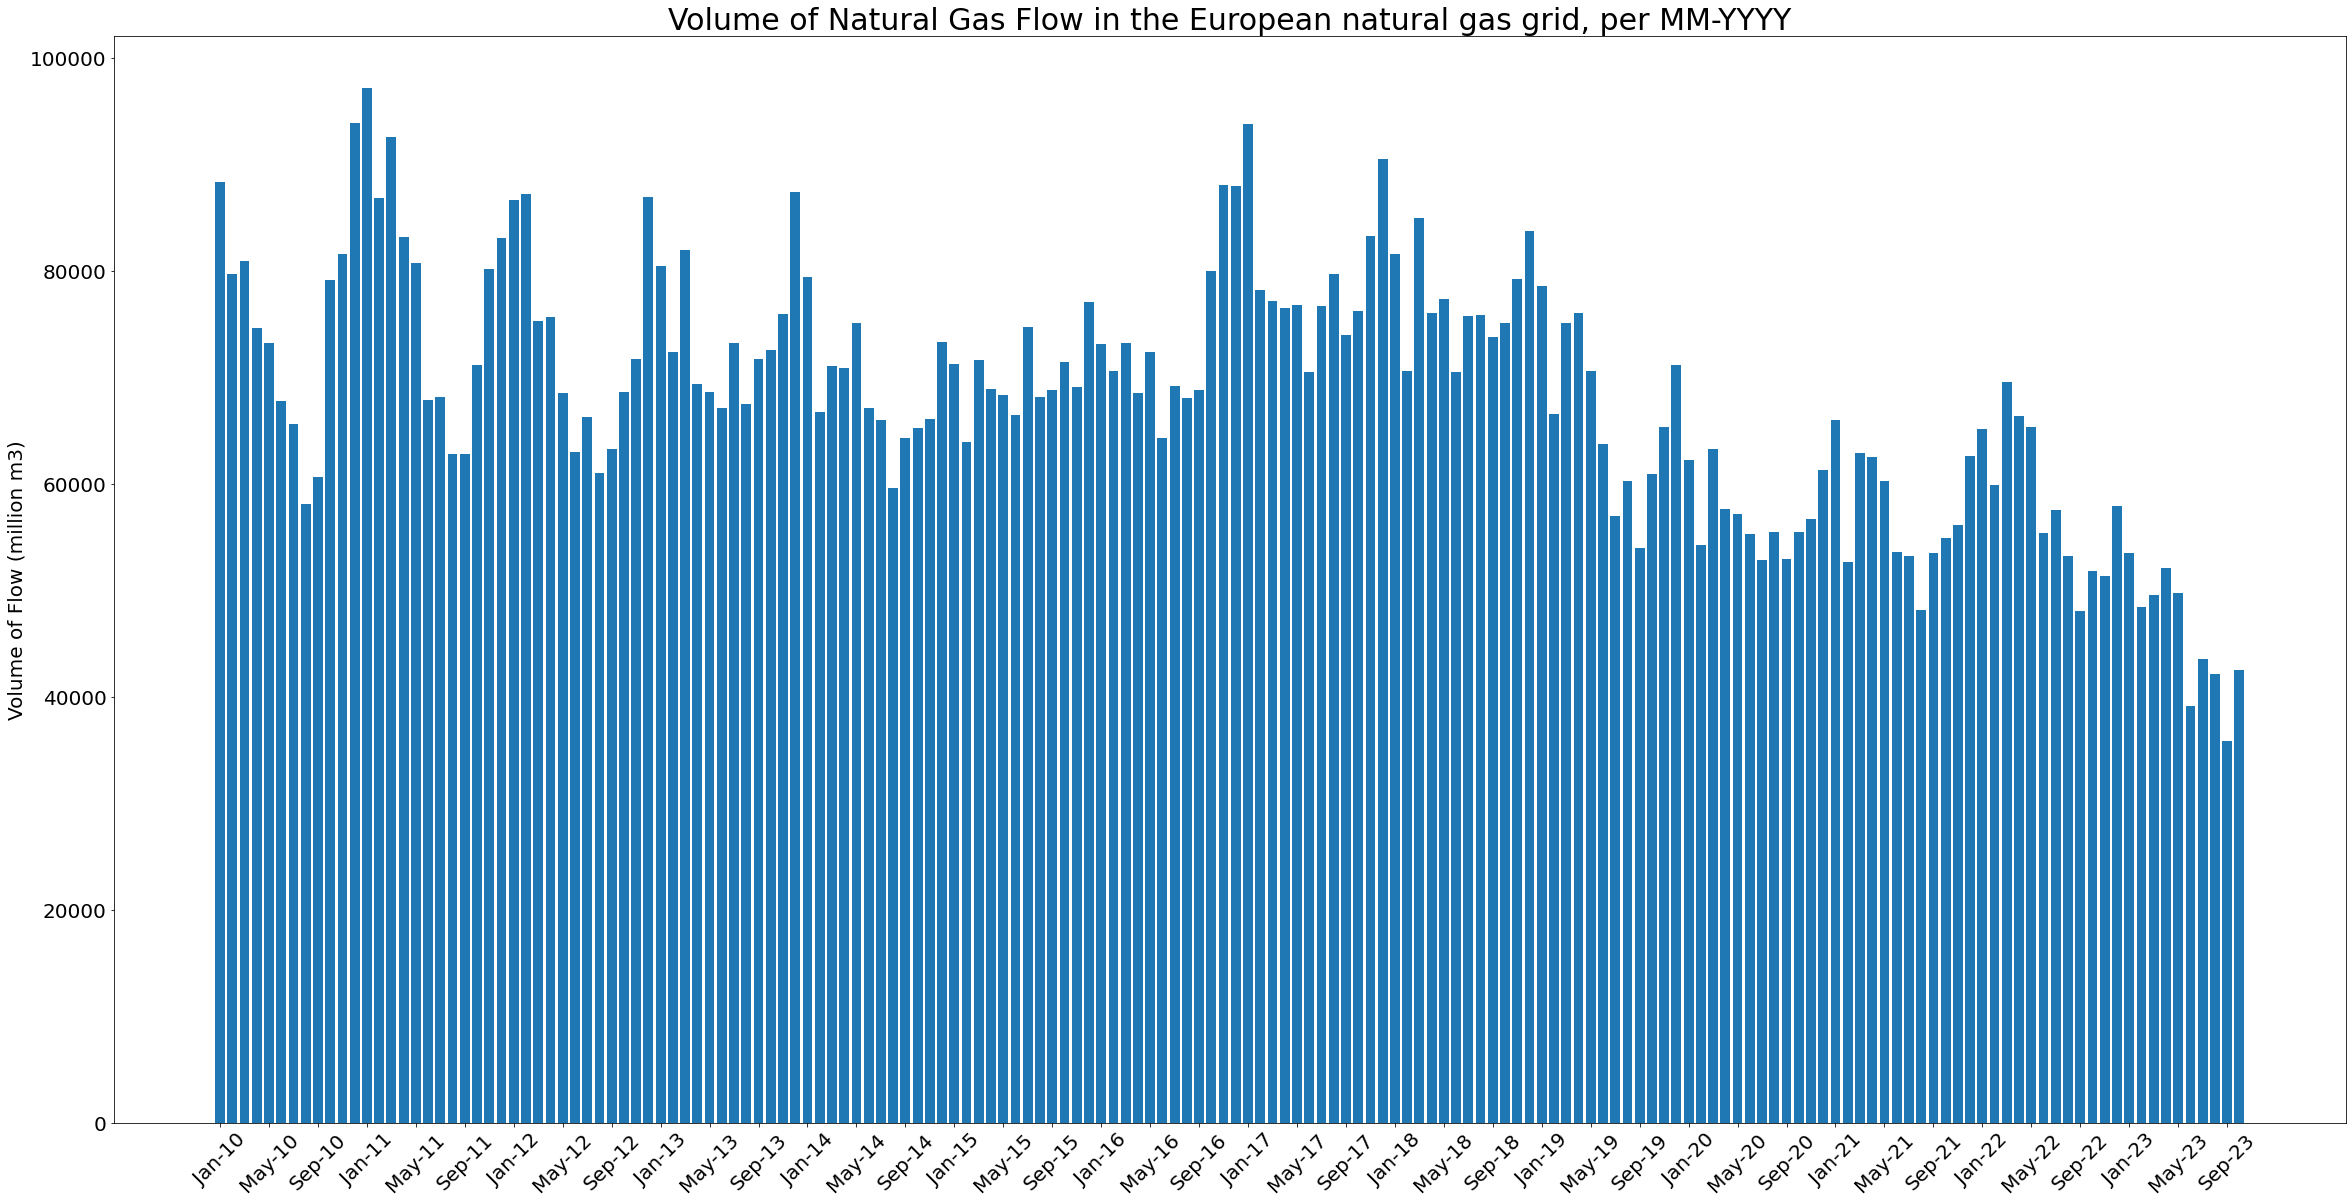

In [89]:
total_flow = mm_yyyy.sum()
plt.figure(figsize=(40, 20))
plt.bar(total_flow.index, total_flow.values)
plt.ylabel('Volume of Flow (million m3)', fontsize=20)
plt.title('Volume of Natural Gas Flow in the European natural gas grid, per MM-YYYY', fontsize=30)
plt.xticks(range(0, len(mm_yyyy.columns), 4), mm_yyyy.columns[range(0, len(mm_yyyy.columns), 4)], rotation=45, fontsize=20)
plt.yticks(fontsize=20)
plt.show()


<Figure size 2880x1440 with 0 Axes>

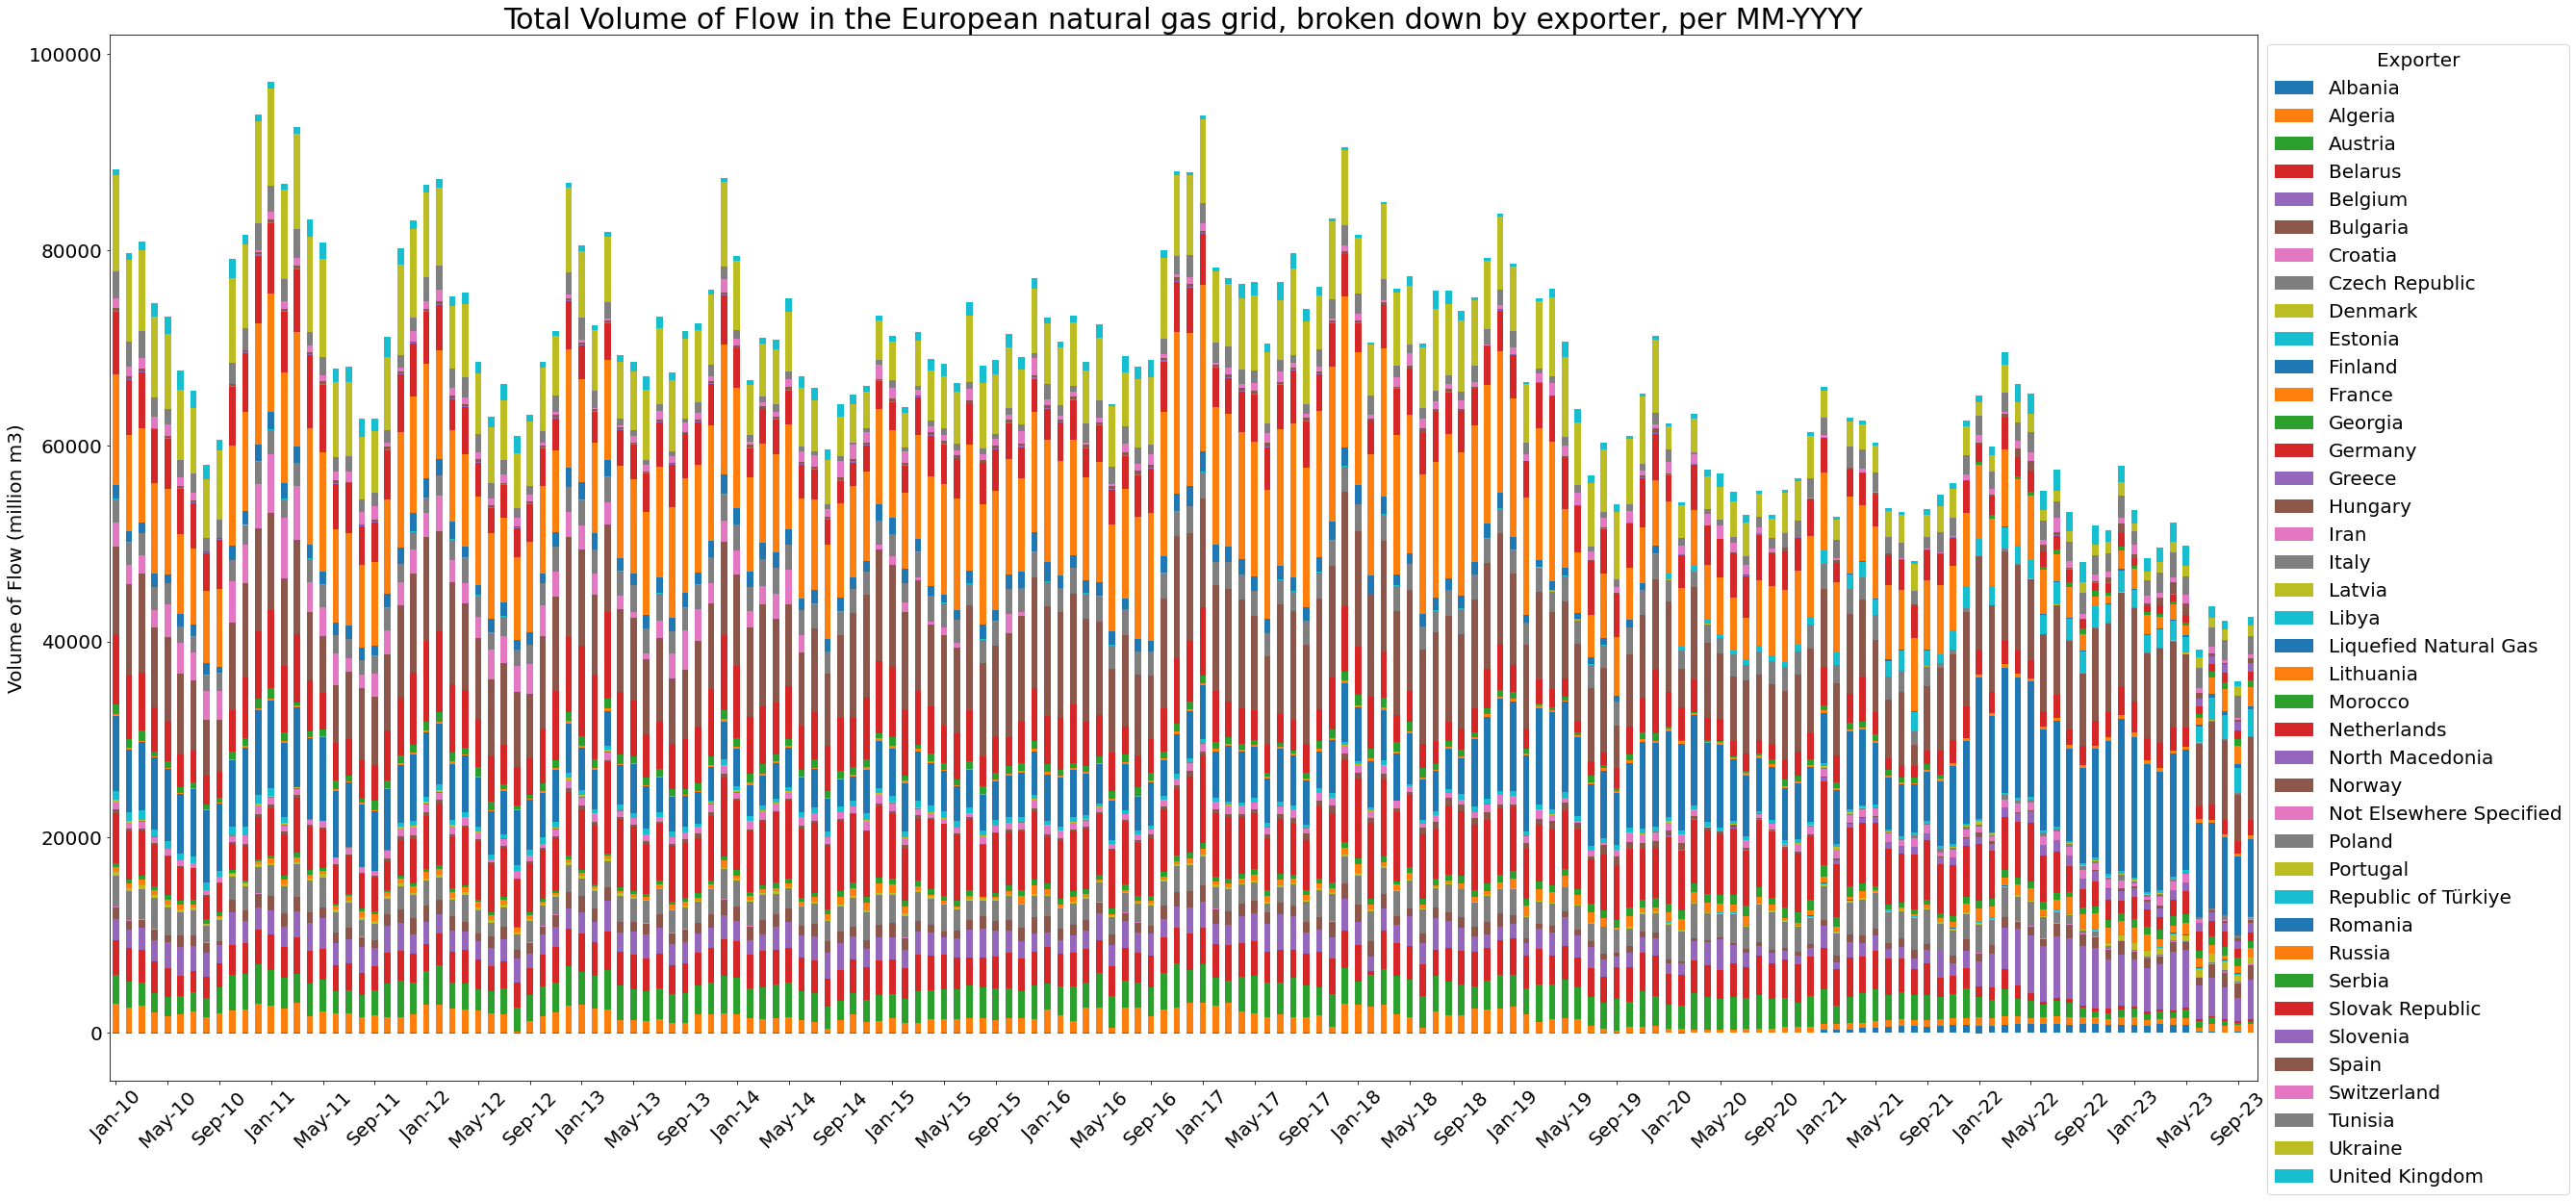

In [90]:
total_export_by_country = country_aggregated_df.groupby('Exit').sum().reset_index().set_index('Exit')
flow_columns = total_export_by_country.columns[total_export_by_country.columns.get_loc('Jan-10'):]
plt.figure(figsize=(40, 20))
total_export_by_country[flow_columns].T.plot(kind='bar', stacked=True, figsize=(40, 20))
plt.title('Total Volume of Flow in the European natural gas grid, broken down by exporter, per MM-YYYY', fontsize=30)
plt.ylabel('Volume of Flow (million m3)', fontsize=20)
plt.xticks(range(0, len(mm_yyyy.columns), 4), mm_yyyy.columns[range(0, len(mm_yyyy.columns), 4)], rotation=45, fontsize=20)
plt.yticks(fontsize=20)
plt.legend(title='Exporter', loc='upper left', bbox_to_anchor=(1, 1), fontsize=20, title_fontsize=20)
plt.show()


<Figure size 2880x1440 with 0 Axes>

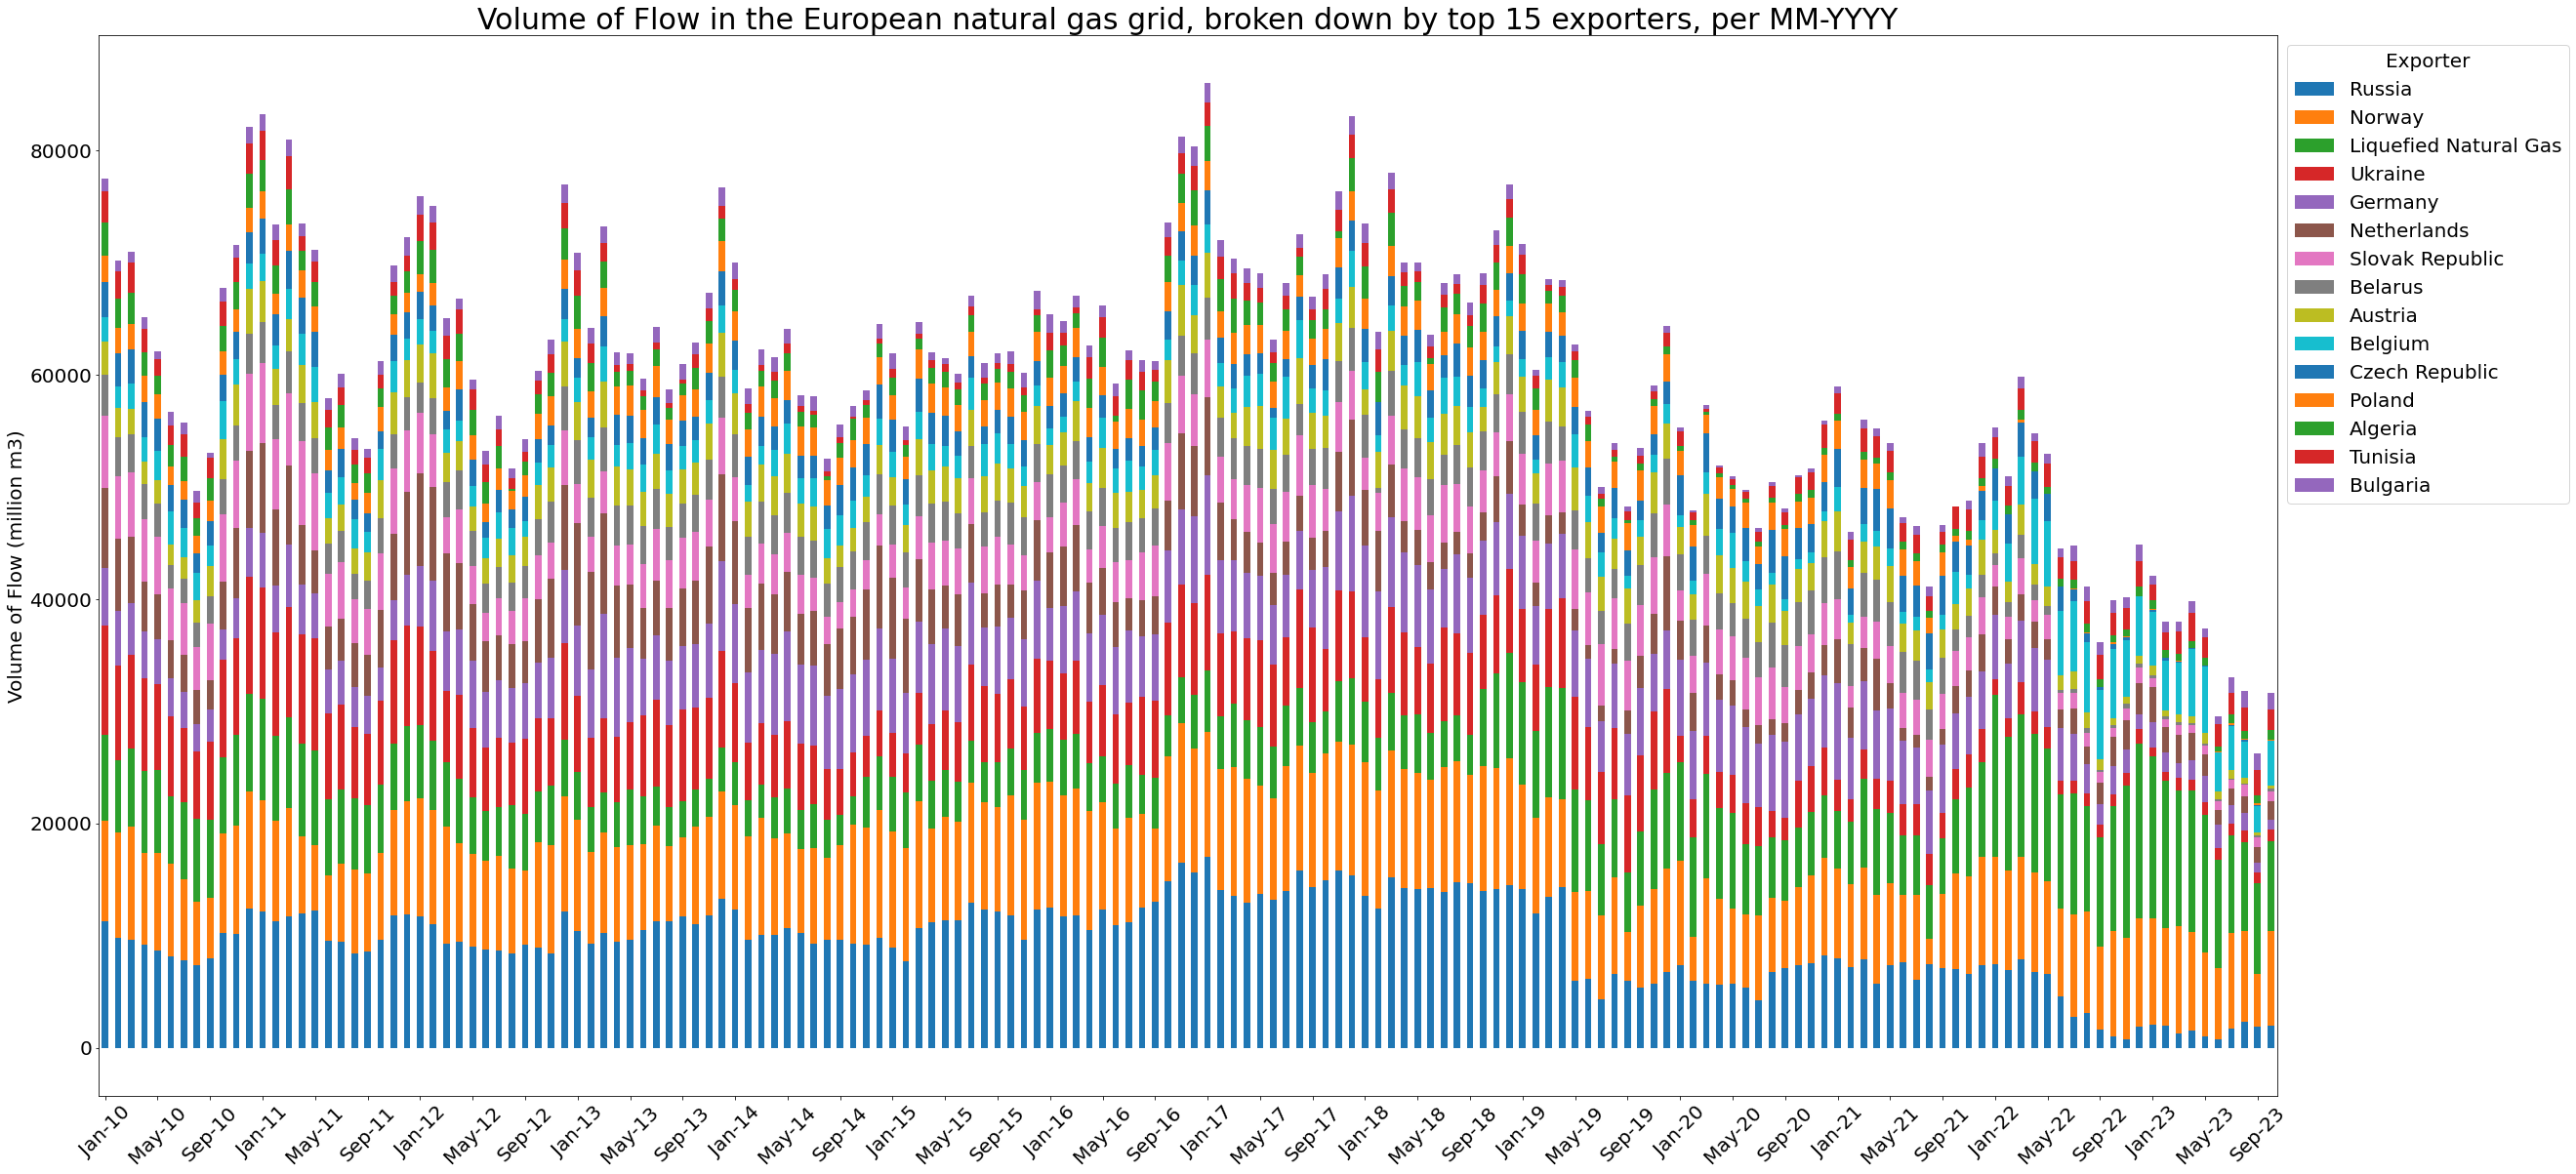

In [91]:
total_export_by_country = country_aggregated_df.groupby('Exit').sum().reset_index().set_index('Exit')
flow_columns = total_export_by_country.columns[total_export_by_country.columns.get_loc('Jan-10'):]
top_exporters = total_export_by_country[flow_columns].sum(axis=1).nlargest(15).index
top_exporters_data = total_export_by_country.loc[top_exporters, flow_columns]

plt.figure(figsize=(40, 20))
top_exporters_data.T.plot(kind='bar', stacked=True, figsize=(40, 20))
plt.title('Volume of Flow in the European natural gas grid, broken down by top 15 exporters, per MM-YYYY', fontsize=30)
plt.ylabel('Volume of Flow (million m3)', fontsize=20)
plt.xticks(range(0, len(mm_yyyy.columns), 4), mm_yyyy.columns[range(0, len(mm_yyyy.columns), 4)], rotation=45, fontsize=20)
plt.yticks(fontsize=20)
plt.legend(title='Exporter', loc='upper left', bbox_to_anchor=(1, 1), fontsize=20, title_fontsize=20)
plt.show()


<Figure size 2880x1440 with 0 Axes>

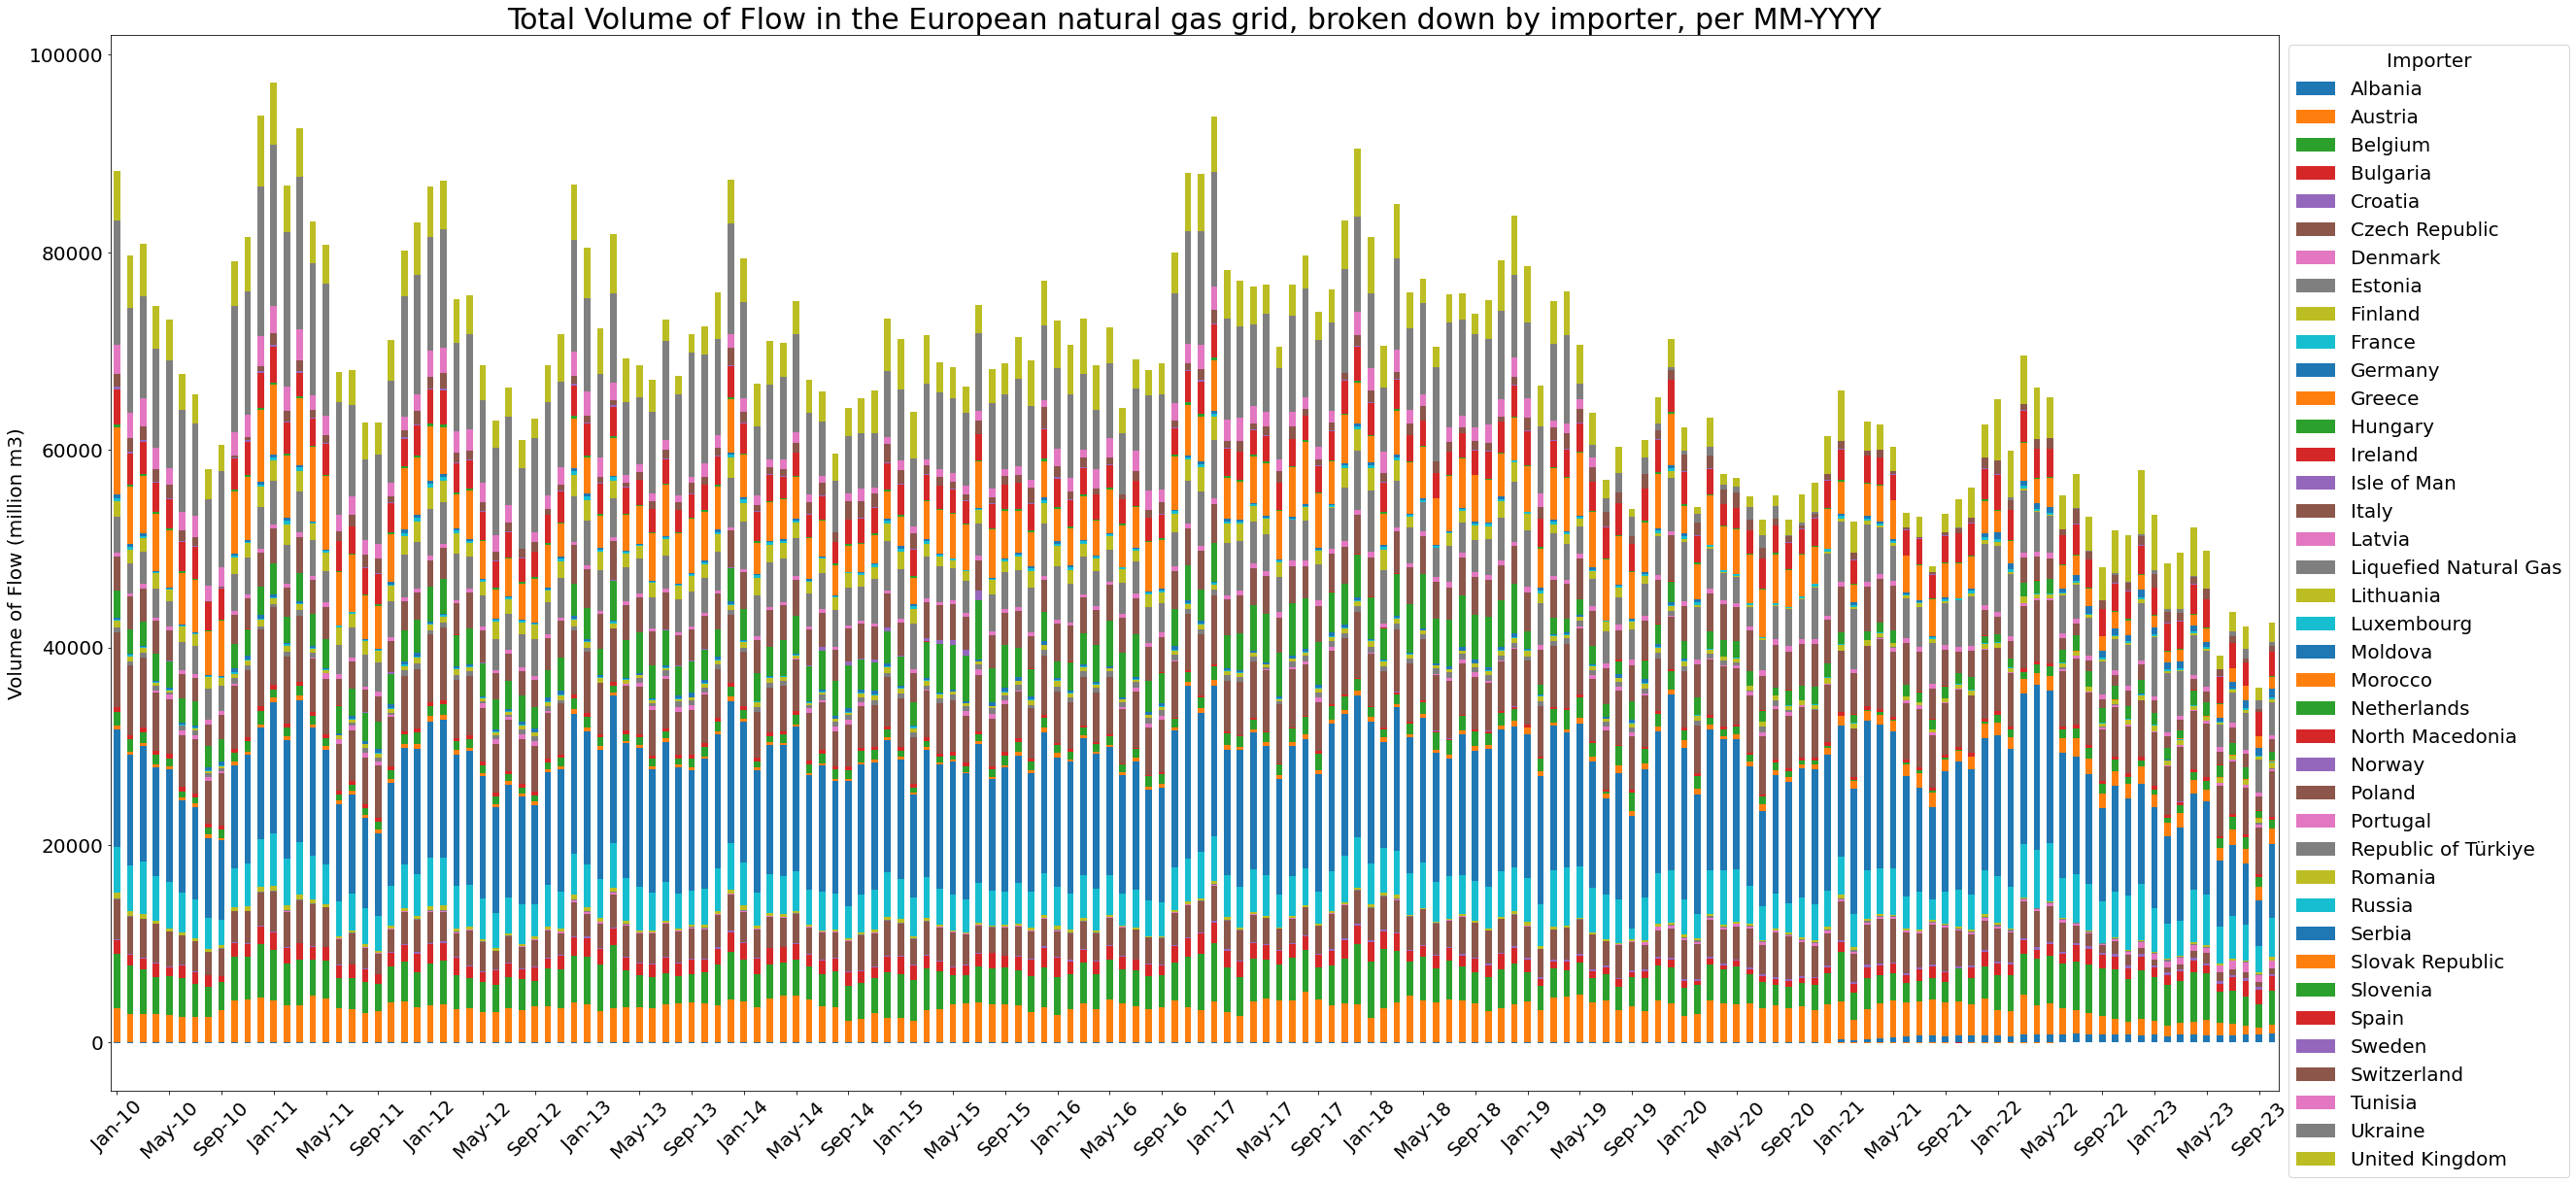

In [92]:
total_import_by_country = country_aggregated_df.groupby('Entry').sum().reset_index().set_index('Entry')
flow_columns = total_import_by_country.columns[total_import_by_country.columns.get_loc('Jan-10'):]
plt.figure(figsize=(40, 20))
ax = total_import_by_country[flow_columns].T.plot(kind='bar', stacked=True, figsize=(40, 20))
plt.title('Total Volume of Flow in the European natural gas grid, broken down by importer, per MM-YYYY', fontsize=30)
plt.ylabel('Volume of Flow (million m3)', fontsize=20)
plt.xticks(range(0, len(mm_yyyy.columns), 4), mm_yyyy.columns[range(0, len(mm_yyyy.columns), 4)], rotation=45, fontsize=20)
plt.yticks(fontsize=20)
plt.legend(title='Importer', loc='upper left', bbox_to_anchor=(1, 1), fontsize=20, title_fontsize=20)
plt.show()


<Figure size 2880x1440 with 0 Axes>

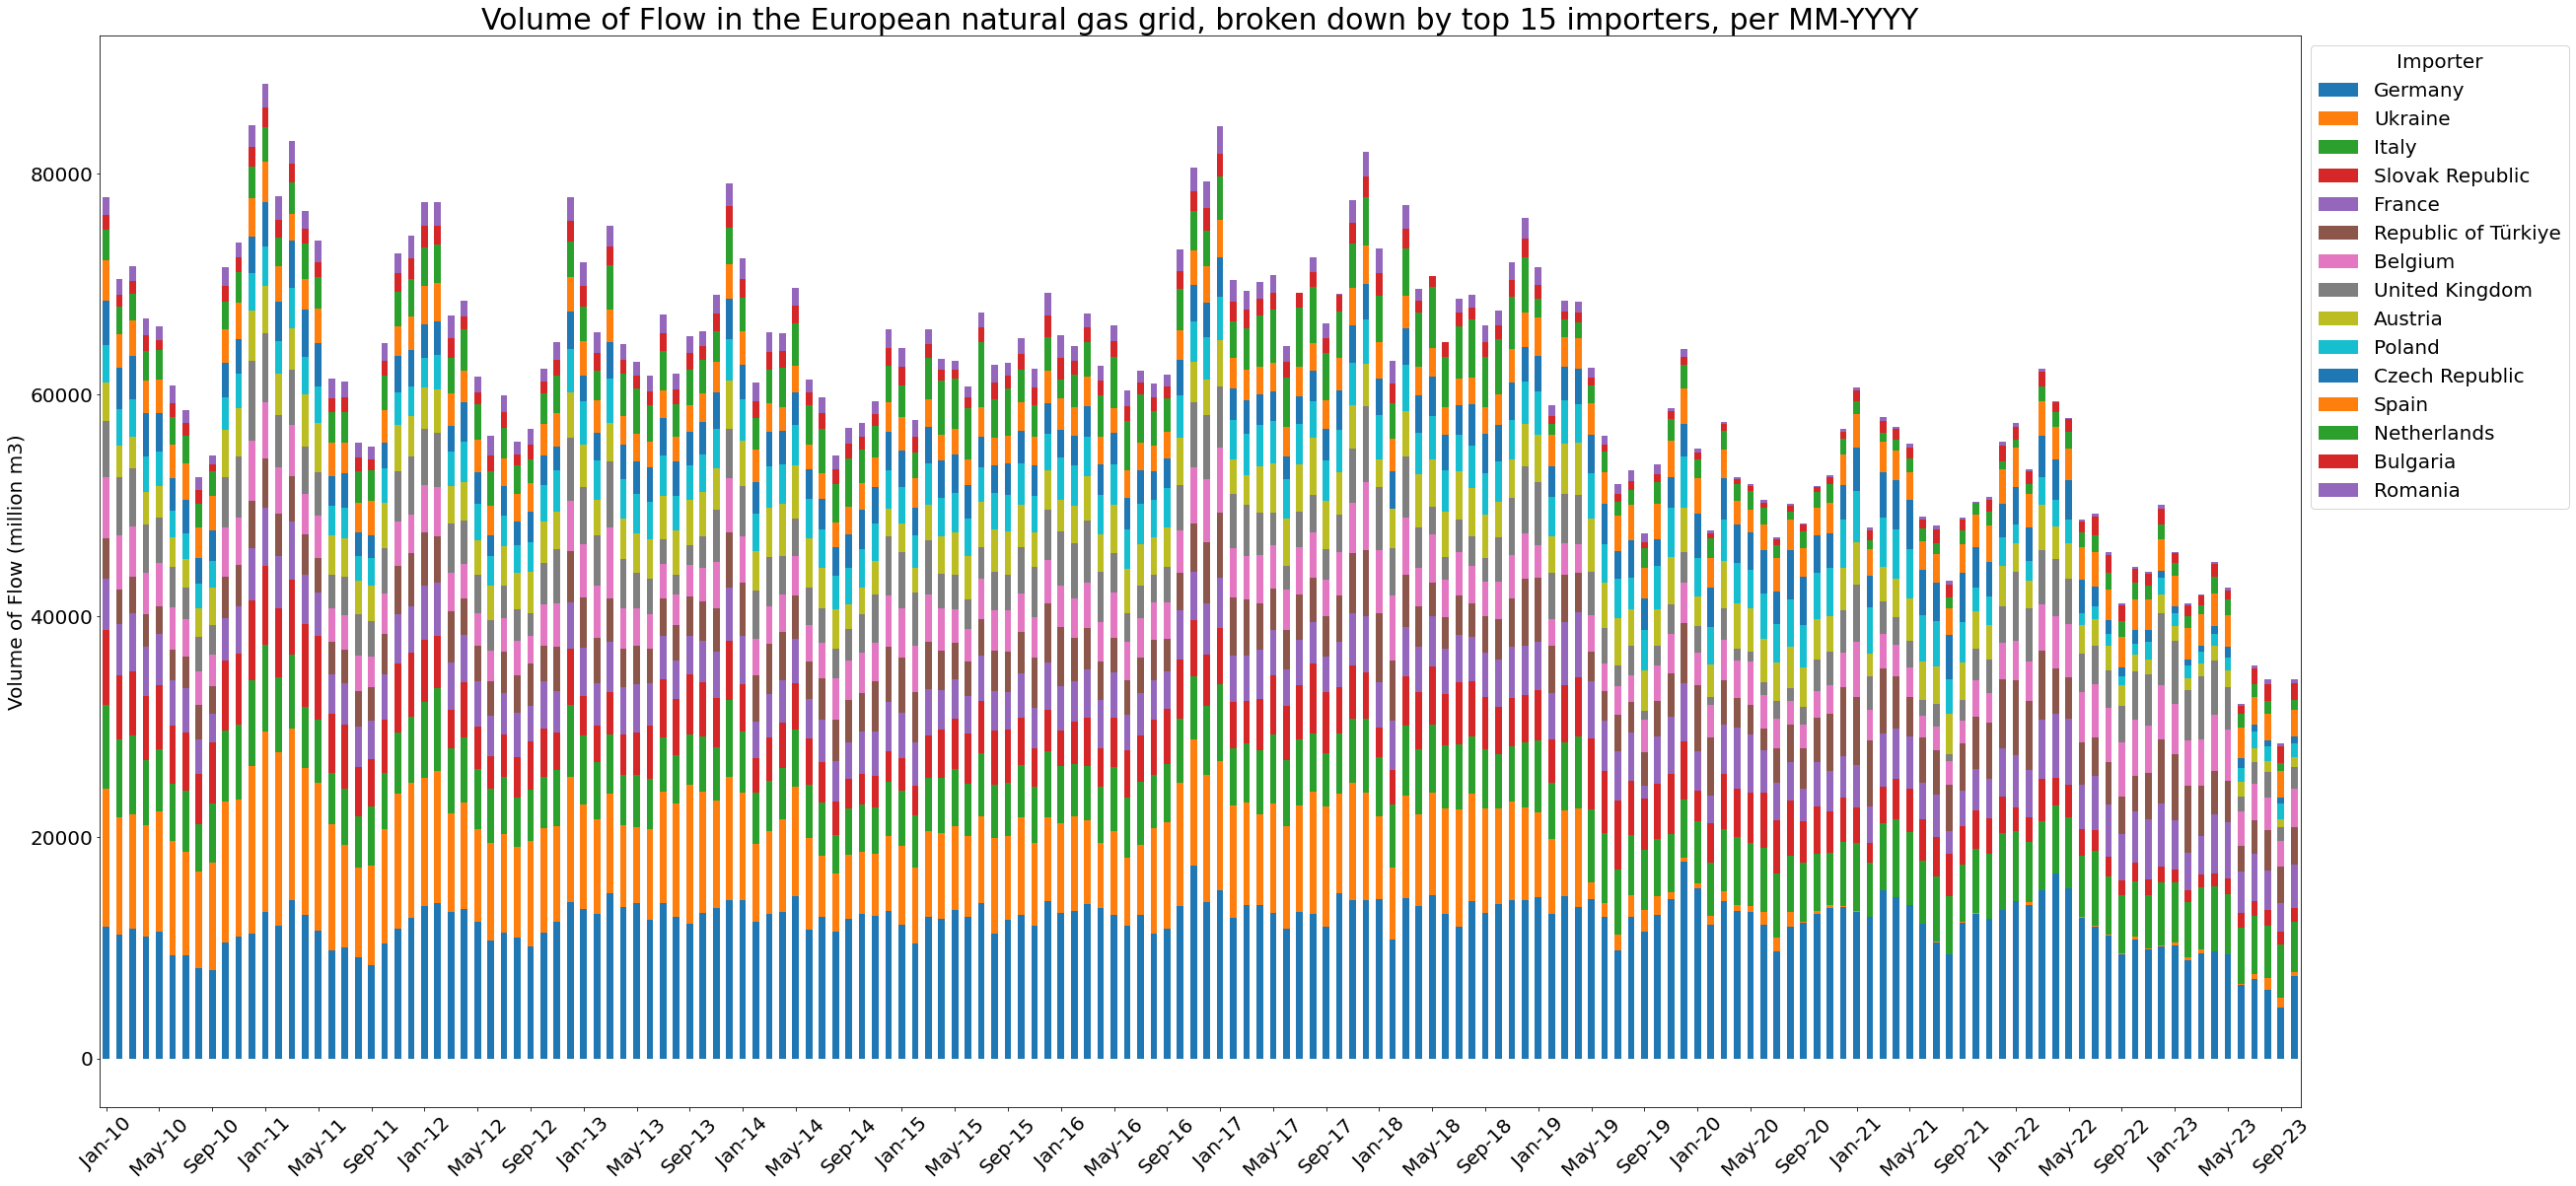

In [93]:
total_import_by_country = country_aggregated_df.groupby('Entry').sum().reset_index().set_index('Entry')
flow_columns = total_import_by_country.columns[total_import_by_country.columns.get_loc('Jan-10'):]
top_importers = total_import_by_country[flow_columns].sum(axis=1).nlargest(15).index
top_importers_data = total_import_by_country.loc[top_importers, flow_columns]

plt.figure(figsize=(40, 20))
ax = top_importers_data[flow_columns].T.plot(kind='bar', stacked=True, figsize=(40, 20))
plt.title('Volume of Flow in the European natural gas grid, broken down by top 15 importers, per MM-YYYY', fontsize=30)
plt.ylabel('Volume of Flow (million m3)', fontsize=20)
plt.xticks(range(0, len(mm_yyyy.columns), 4), mm_yyyy.columns[range(0, len(mm_yyyy.columns), 4)], rotation=45, fontsize=20)
plt.yticks(fontsize=20)
plt.legend(title='Importer', loc='upper left', bbox_to_anchor=(1, 1), fontsize=20, title_fontsize=20)
plt.show()

<Figure size 2880x1440 with 0 Axes>

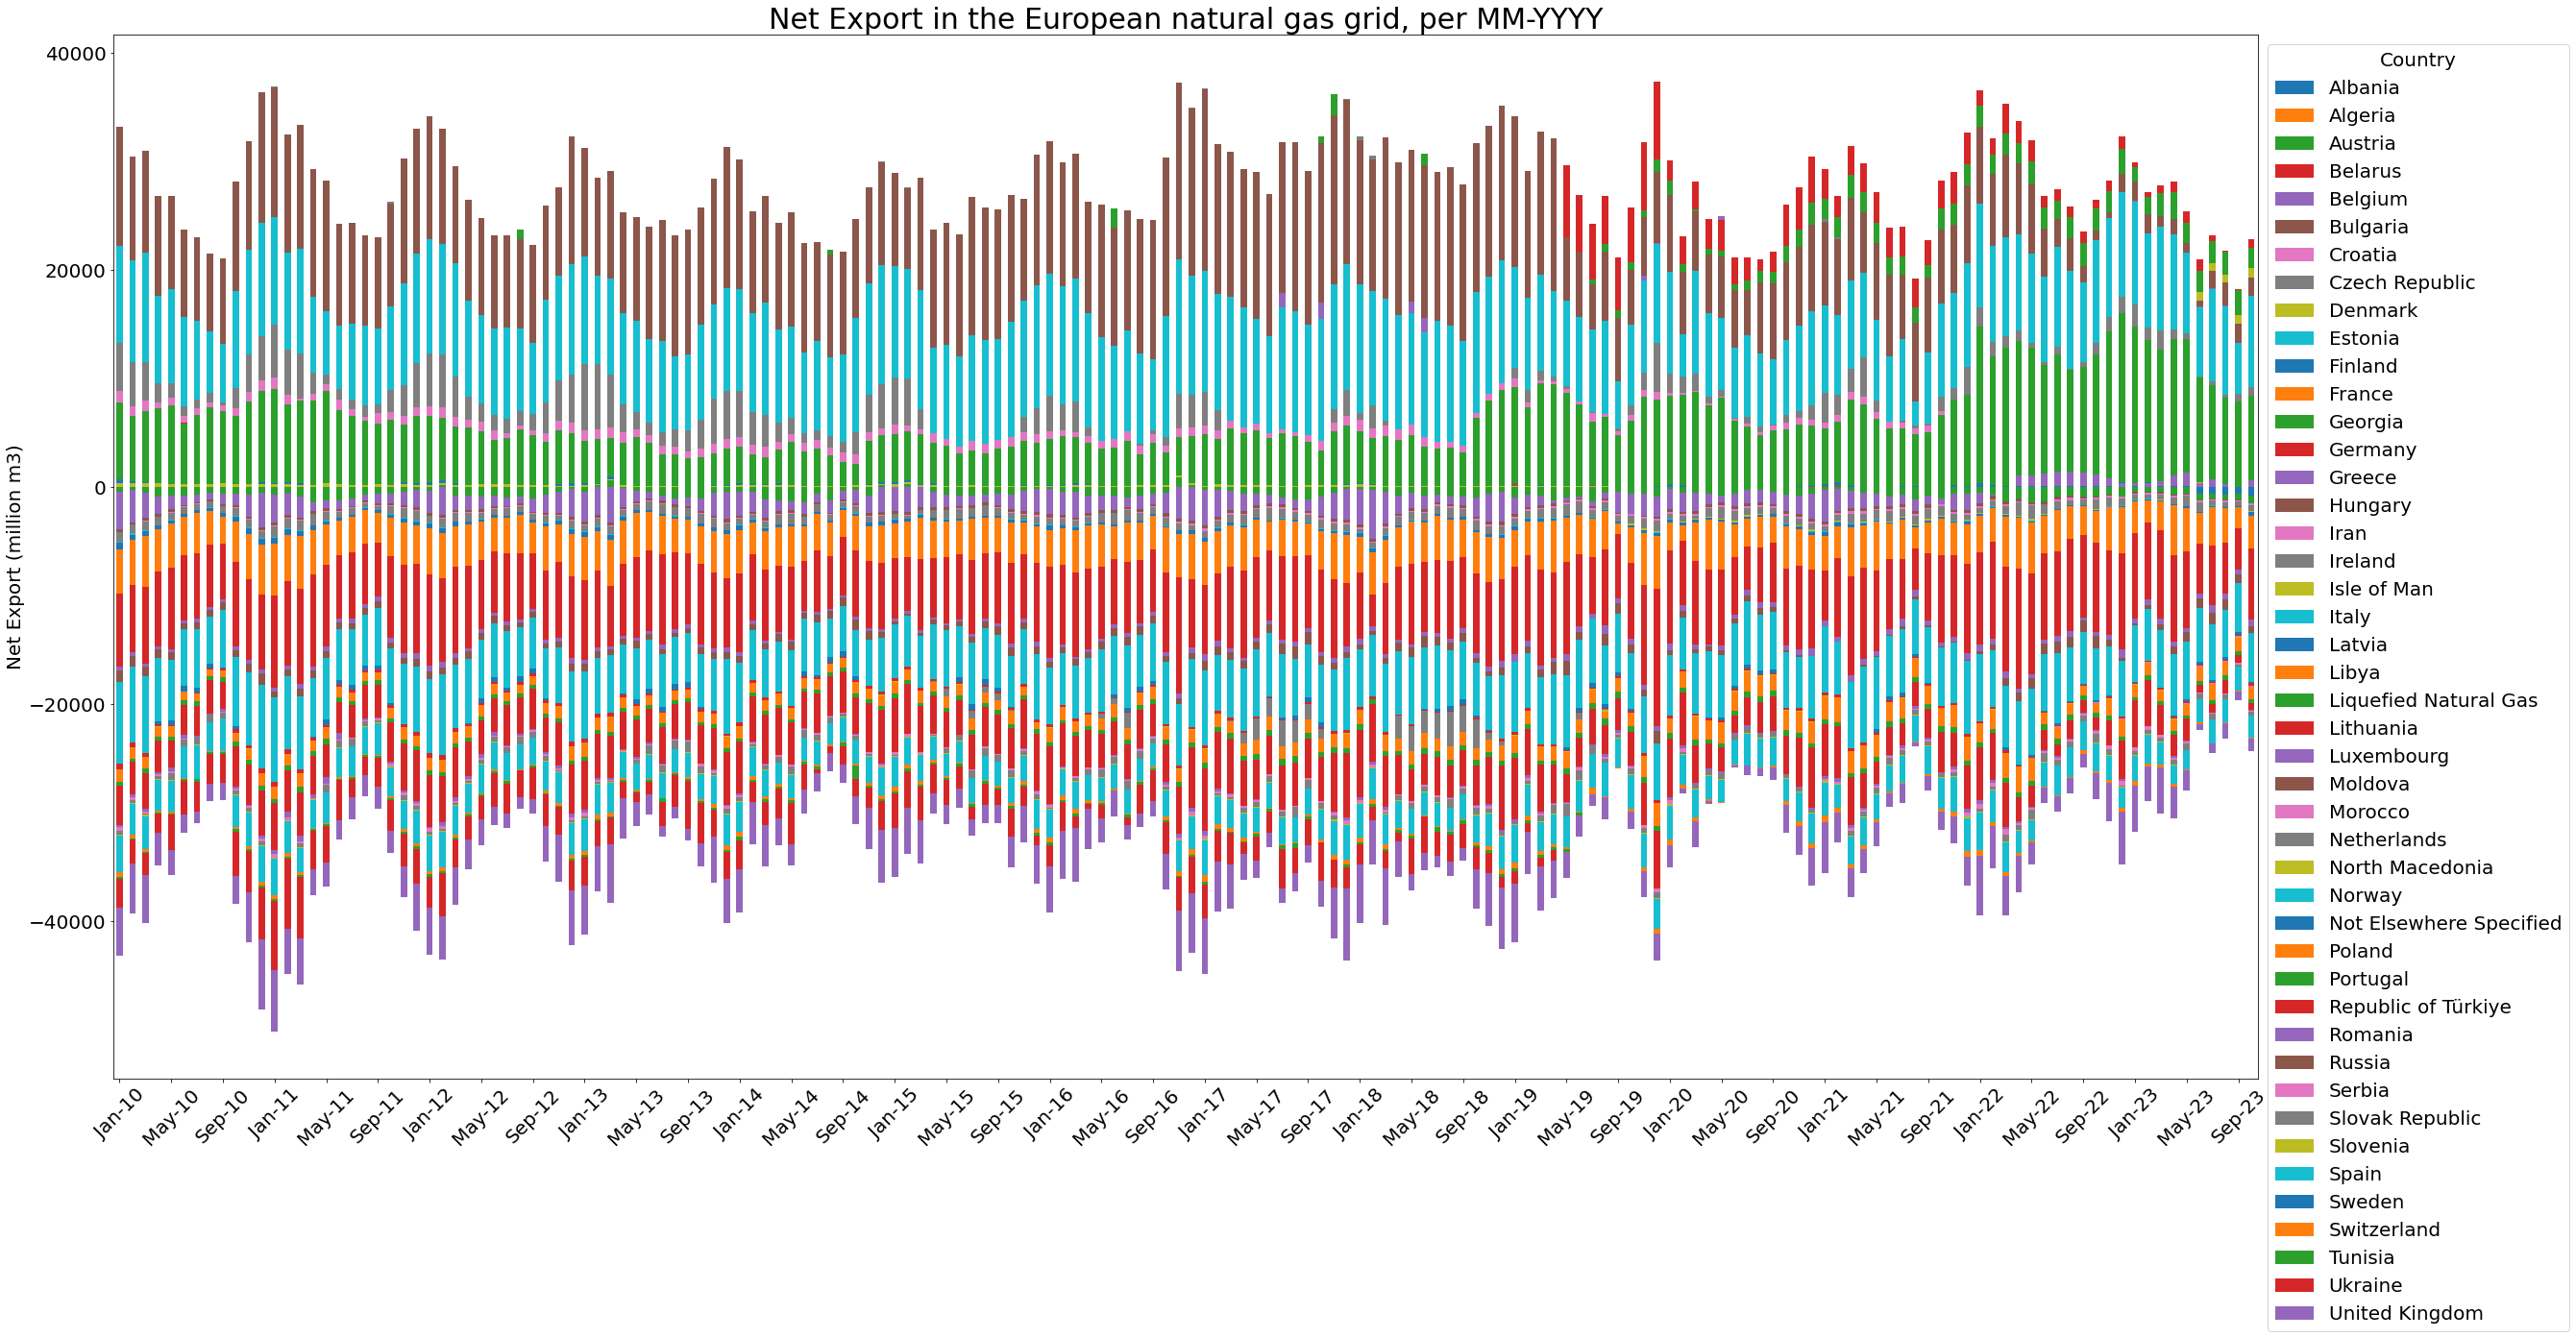

In [94]:
net_export_by_country = total_export_by_country[flow_columns] - total_import_by_country[flow_columns]
plt.figure(figsize=(40, 20))
ax = net_export_by_country.T.plot(kind='bar', stacked=True, figsize=(40, 20))
plt.title('Net Export in the European natural gas grid, per MM-YYYY', fontsize=30)
plt.ylabel('Net Export (million m3)', fontsize=20)
plt.xticks(range(0, len(mm_yyyy.columns), 4), mm_yyyy.columns[range(0, len(mm_yyyy.columns), 4)], rotation=45, fontsize=20)
plt.yticks(fontsize=20)
plt.legend(title='Country', loc='upper left', bbox_to_anchor=(1, 1), fontsize=20, title_fontsize=20)
plt.show()